# Case interview - Wind Forecast Denmark: Power Production Model

# Task 

Make a wind model for wind power production in one or both of the two price zones in Denmark (DK1 and DK2) based on the wind and temperature data given in the file WindData.csv (Attached). The file WindData.csv contains actual production for the two Danish price zones, forecasted wind speed (WND) and wind direction (DD) from several points in Denmark. Your task is to make a model based on the historical data.

#### Loading Python packages

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import numpy as np
plt.rcParams["figure.figsize"]=15,10
pd.set_option('display.max_columns', 500)

#### Import the data

In [2]:
base_dir = os.path.dirname(os.getcwd())
filename = os.path.join(base_dir,"data","WindData.csv")

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head()

,Date,Wind Production DK1,Wind Production DK2,Station1_WND,Station1_DD,Station2_WND,Station2_DD,Station3_WND,Station3_DD,Station4_WND,...,Station8_WND,Station8_DD,Station9_WND,Station9_DD,Station10_WND,Station10_DD,Station11_WND,Station11_DD,Station12_WND,Station12_DD
0,01/01/2016 00:00,1396.847852,122.705532,9.6,191,6.1,179.0,7.0,224.0,8.4,...,12.4,199.0,7.7,228,6.1,195,5.7,184,10.2,202
1,01/01/2016 01:00,1304.469541,105.147667,9.8,188,6.1,177.0,6.6,227.0,8.3,...,13.2,197.0,7.3,231,6.0,193,5.3,185,10.7,200
2,01/01/2016 02:00,1201.416846,80.806082,9.9,188,6.6,174.0,6.3,231.0,8.3,...,13.4,197.0,6.9,235,6.3,193,5.3,188,10.4,199
3,01/01/2016 03:00,1198.324268,67.637683,10.0,187,7.1,172.0,6.0,234.0,8.4,...,13.6,197.0,6.6,239,6.7,193,5.2,191,10.1,197
4,01/01/2016 04:00,1113.926804,51.576228,9.8,188,7.5,172.0,6.1,232.0,8.5,...,13.0,202.0,6.4,237,7.0,193,4.8,195,9.7,197


#### Adjusting the index

In [5]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d/%m/%Y %H:%M")

# Converting the datatype of the dataset into float for the regression model
df = df.set_index("Date").sort_index().astype(float) 

In [6]:
col_actual_prod = df.groupby(by = lambda x: "Wind Production" in x, axis=1).groups[True]
col_wind_speed = df.groupby(by = lambda x: "WND" in x, axis=1).groups[True]
col_wind_dir = df.groupby(by = lambda x: "DD" in x, axis=1).groups[True]

### Adjusting the variables

In [7]:
X = df[col_wind_speed.union(col_wind_dir, sort=False)].to_numpy()

In [8]:
rows = np.arange(X.shape[0])
size_test = int(1.5*X.shape[0]) 
#The factor 1.5 is added in order achieve 80/20-distribution between the training and test set.

In [9]:
rng = np.random.default_rng(5)
index_training = np.unique(rng.choice(rows, size = size_test))
index_test = np.delete(rows, index_training, 0)
ratio = len(index_training)/X.shape[0]

print(f"The ratio of row distribution between the datasets for training and test is {ratio:.2%}.")

The ratio of row distribution between the datasets for training and test is 78.04%.


In [10]:
X_training = X[list(index_training)]
X_test = X[list(index_test)]

In [11]:
y_dk1 = df[col_actual_prod[0]].to_numpy()
y_dk2 = df[col_actual_prod[1]].to_numpy()

# Wind Power Production model for price zone DK1

In [12]:
regr_dk1 = svm.SVR(kernel = "linear")
regr_dk1.fit(X[index_training],y_dk1[index_training])

SVR(kernel='linear')

In [13]:
y_pred_dk1 = regr_dk1.predict(X[index_test])

In [14]:
"The R-squared value for the Wind Power Production Model for the price zone DK1 is {:.2f}".format(metrics.r2_score(y_dk1[index_test], y_pred_dk1))

'The R-squared value for the Wind Power Production Model for the price zone DK1 is 0.90'

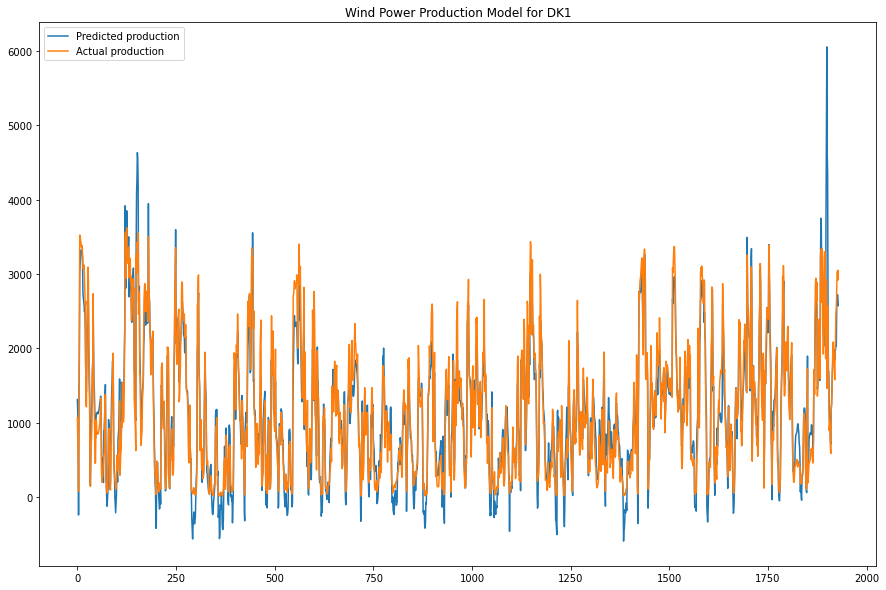

In [15]:
plt.figure()
plt.title("Wind Power Production Model for DK1")
plt.plot(y_pred_dk1, label = "Predicted production")
plt.plot(y_dk1[index_test], label = "Actual production")
plt.legend()

#### Checking the model parameters

In [16]:
regr_dk1.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Wind Power Production model for price zone DK2

In [17]:
regr_dk2 = svm.SVR(kernel = "linear")
regr_dk2.fit(X[index_training],y_dk2[index_training])

SVR(kernel='linear')

In [18]:
y_pred_dk2 = regr_dk2.predict(X[index_test])

In [19]:
"The R-squared value for the Wind Power Production Model for the price zone DK2 is {:.2f}".format(metrics.r2_score(y_dk2[index_test], y_pred_dk2))

'The R-squared value for the Wind Power Production Model for the price zone DK2 is 0.88'

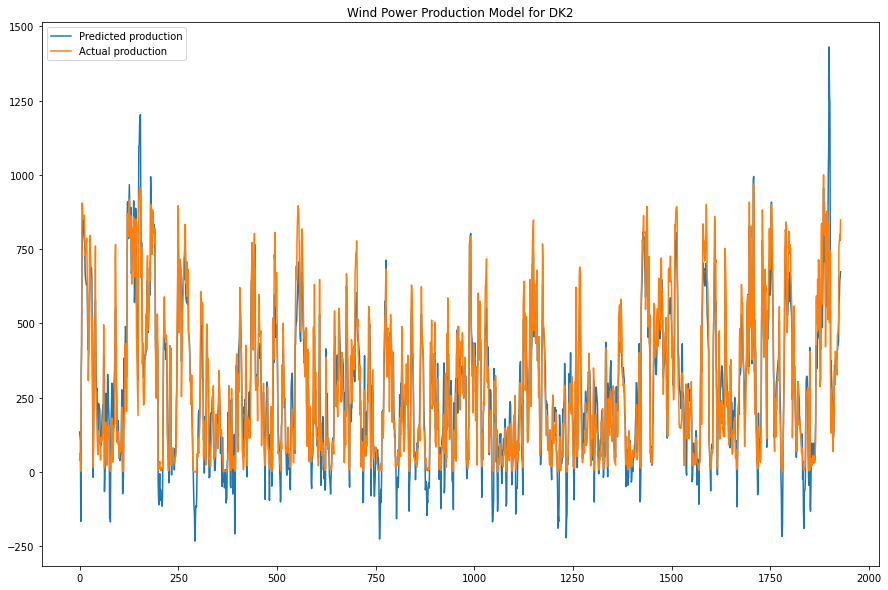

In [20]:
plt.figure()
plt.title("Wind Power Production Model for DK2")
plt.plot(y_pred_dk2, label = "Predicted production")
plt.plot(y_dk2[index_test], label = "Actual production")
plt.legend()

#### Checking the model parameters

In [52]:
regr_dk2.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Comparison of the models

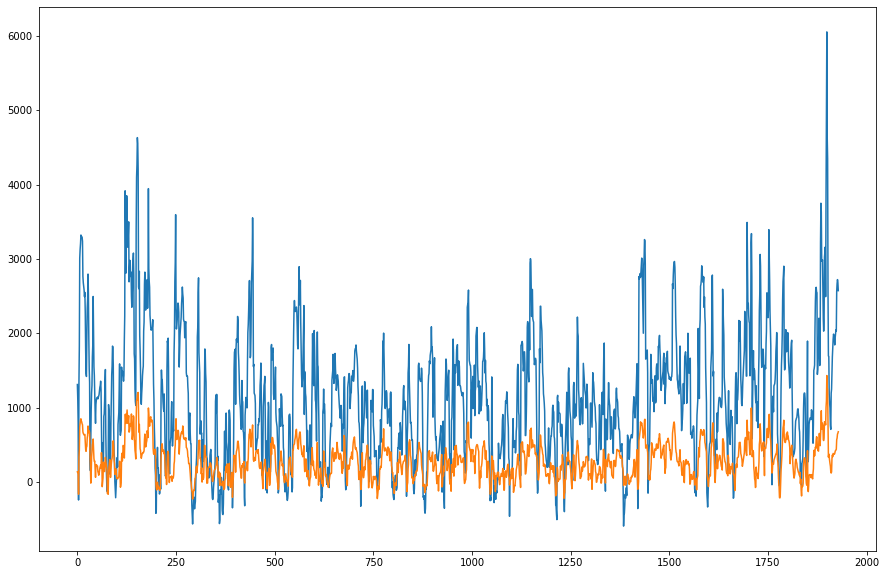

In [51]:
plt.figure()
plt.plot(y_pred_dk1)
plt.plot(y_pred_dk2)

## Investigating the extreme values

In [34]:
df_model_dk1 = pd.DataFrame({"model_dk1": y_pred_dk1})
df_model_dk1 = df_model_dk1.set_index(df.iloc[index_test].index)
df_model_dk2 = pd.DataFrame({"model_dk2": y_pred_dk2})
df_model_dk2 = df_model_dk2.set_index(df.iloc[index_test].index)
df_models = pd.concat([df.iloc[index_test], df_model_dk1, df_model_dk2], axis = 1)

In [39]:
df_models["diff_dk1"] = abs(df_models["Wind Production DK1"] - df_models["model_dk1"])
df_models["diff_dk2"] = abs(df_models["Wind Production DK2"] - df_models["model_dk2"])

#### Maximal difference between predicted and true value

In [43]:
df_models[df_models["diff_dk1"] == df_models["diff_dk1"].max()]

,Wind Production DK1,Wind Production DK2,Station1_WND,Station1_DD,Station2_WND,Station2_DD,Station3_WND,Station3_DD,Station4_WND,Station4_DD,Station5_WND,Station5_DD,Station6_WND,Station6_DD,Station7_WND,Station7_DD,Station8_WND,Station8_DD,Station9_WND,Station9_DD,Station10_WND,Station10_DD,Station11_WND,Station11_DD,Station12_WND,Station12_DD,model_dk1,model_dk2,diff_dk1,diff_dk2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-26 22:00:00,1458.744285,768.407564,25.1,297.0,24.7,287.0,20.5,268.0,24.0,294.0,21.2,287.0,21.8,280.0,28.2,277.0,28.2,297.0,23.6,267.0,22.1,285.0,22.0,264.0,23.0,295.0,6054.430404,1430.353181,4595.686119,661.945617


In [48]:
df_models[df_models["Wind Production DK1"] == df_models["Wind Production DK1"].max()]

,Wind Production DK1,Wind Production DK2,Station1_WND,Station1_DD,Station2_WND,Station2_DD,Station3_WND,Station3_DD,Station4_WND,Station4_DD,Station5_WND,Station5_DD,Station6_WND,Station6_DD,Station7_WND,Station7_DD,Station8_WND,Station8_DD,Station9_WND,Station9_DD,Station10_WND,Station10_DD,Station11_WND,Station11_DD,Station12_WND,Station12_DD,model_dk1,model_dk2,diff_dk1,diff_dk2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-27 17:00:00,3621.010319,876.396828,18.5,225.0,13.6,223.0,15.0,230.0,16.4,224.0,14.4,225.0,16.5,232.0,17.3,226.0,22.4,226.0,16.9,226.0,14.9,228.0,14.2,232.0,18.5,225.0,3849.275349,905.860136,228.26503,29.463308


#### Minimal negative predicted value

In [49]:
df_models[df_models["model_dk1"] == df_models["model_dk1"].min()]

,Wind Production DK1,Wind Production DK2,Station1_WND,Station1_DD,Station2_WND,Station2_DD,Station3_WND,Station3_DD,Station4_WND,Station4_DD,Station5_WND,Station5_DD,Station6_WND,Station6_DD,Station7_WND,Station7_DD,Station8_WND,Station8_DD,Station9_WND,Station9_DD,Station10_WND,Station10_DD,Station11_WND,Station11_DD,Station12_WND,Station12_DD,model_dk1,model_dk2,diff_dk1,diff_dk2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-19 14:00:00,21.269699,25.563582,0.8,40.0,0.7,283.0,5.2,68.0,0.4,40.0,2.2,82.0,3.5,61.0,1.7,314.0,2.0,89.0,3.9,82.0,2.3,74.0,3.1,53.0,2.8,70.0,-595.834676,-49.139472,617.104376,74.703054


In [50]:
df_models[df_models["Wind Production DK1"] == df_models["Wind Production DK1"].min()]

,Wind Production DK1,Wind Production DK2,Station1_WND,Station1_DD,Station2_WND,Station2_DD,Station3_WND,Station3_DD,Station4_WND,Station4_DD,Station5_WND,Station5_DD,Station6_WND,Station6_DD,Station7_WND,Station7_DD,Station8_WND,Station8_DD,Station9_WND,Station9_DD,Station10_WND,Station10_DD,Station11_WND,Station11_DD,Station12_WND,Station12_DD,model_dk1,model_dk2,diff_dk1,diff_dk2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-11 15:00:00,10.021201,65.939502,1.5,104.0,1.3,268.0,2.9,64.0,1.0,87.0,1.5,111.0,2.6,46.0,1.1,330.0,2.8,113.0,6.4,64.0,1.7,130.0,0.8,20.0,2.9,101.0,-512.687298,-48.47326,522.708499,114.412762


In [46]:
df_models["diff_dk1"].describe()

count    1929.000000
mean      195.944174
std       201.923124
min         0.149863
25%        73.544125
50%       155.879099
75%       270.778217
max      4595.686119
Name: diff_dk1, dtype: float64

In [47]:
df_models["diff_dk2"].describe()

count    1929.000000
mean       69.313204
std        56.657870
min         0.072170
25%        28.694489
50%        57.780304
75%        99.168816
max       767.579522
Name: diff_dk2, dtype: float64